## Student name: Firdosa mohamed

## Student pace: Hybrid

## Technical mentor : Maryann Mwikali

## Problem statement

The goal of this project is to create a prediction model that can identify SyriaTel customers who are prone to churn. Our goal is to identify predictable patterns and key features linked with customer churn. Specifically, we shall answer the following questions:

Are there any patterns among clients that stop utilizing SyriaTel services?
What features make a substantial contribution to client churn?

## Business Understanding

SyriaTel is a prominent mobile network operator in Syria.The company provides calls, news, messages, GSM, and internet services. The industry is now experiencing severe competition, thus client retention is critical for sustaining corporate revenue development. Customer churn study will assist us in identifying the factors that contribute to customer attrition. This will allow for the execution of steps that will assist reduce the number of clients who discontinue utilizing the company's services. The stakeholder audience here includes the data analytics team, sales team, senior management, and marketing executives.

## Objectives

1.Create a machine learning model that can effectively anticipate customer attrition based on previous customer data and behavioral patterns.

2.Identify the essential attributes that contribute significantly to client attrition.This will allow for the development of insights into the fundamental reasons.

3.To achieve a high level of accuracy and recall in the churn prediction model in order to reduce both false negatives (customers who churn but were not forecasted) and false positives (customers who were expected to churn but did not).

4.Utilize the prediction model to develop mitigation strategies to assist reduce customer turnover.

5.To make advice to the company on how to retain clients, which will assist the company keep its market share.

## Import necessary libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import zscore
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

## Data understanding

In [4]:
# loading data 
df = pd.read_csv("C:\\Users\\Adan\\Downloads\\bigml_59c28831336c6604c800002a.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
# checkthe shape of the dataset
df.shape

(3333, 21)

In [6]:
# check for datatypes
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

there are 5 columns with object values and the rest have numeric values

In [7]:
# checking for missing values
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [8]:
# check for duplicates 
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3328    False
3329    False
3330    False
3331    False
3332    False
Length: 3333, dtype: bool

There are no duplicates and missing values in our data set hence will proceed to EDA

## Exploratory data analysis

In [9]:
#dropping phonenumber column not important in our analysis
df.drop(['phone number'],axis=1,inplace=True)


In [10]:
df.nunique()

state                       51
account length             212
area code                    3
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

## Univariate Analysis

Below are visualizaions of counts in the categorical variables except the state colum

415    1655
510     840
408     838
Name: area code, dtype: int64


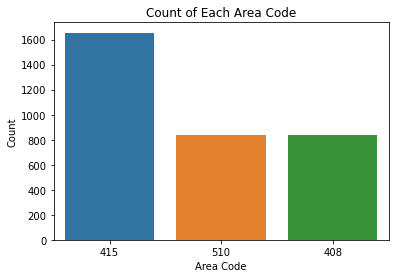

In [11]:
area_code_counts = df['area code'].value_counts()
print(area_code_counts)

# Plot the counts using Seaborn
sns.countplot(data=df, x='area code', order=area_code_counts.index)
plt.xlabel('Area Code')
plt.ylabel('Count')
plt.title('Count of Each Area Code')
plt.show()

In [ ]:
df['churn'] = df['churn'].map({True: 1, False: 0}).astype('int') 

False    2850
True      483
Name: churn, dtype: int64


Text(0.5, 1.0, 'count of churn')

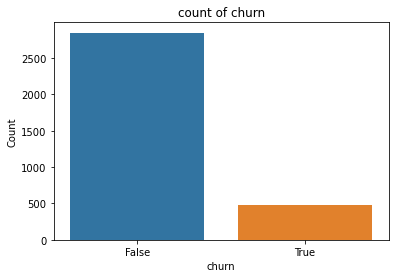

In [12]:
print(df.churn.value_counts())
sns.countplot(data=df, x='churn');
plt.xlabel('churn')
plt.ylabel('Count')
plt.title('count of churn')

no     3010
yes     323
Name: international plan, dtype: int64


Text(0.5, 1.0, 'count of international plan')

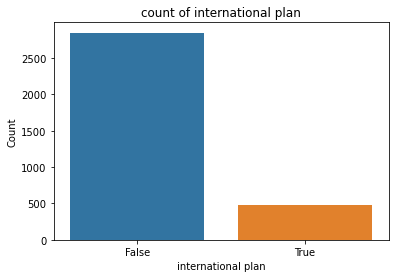

In [13]:
print(df['international plan'].value_counts())
sns.countplot(data=df, x='churn');
plt.xlabel('international plan')
plt.ylabel('Count')
plt.title('count of international plan')

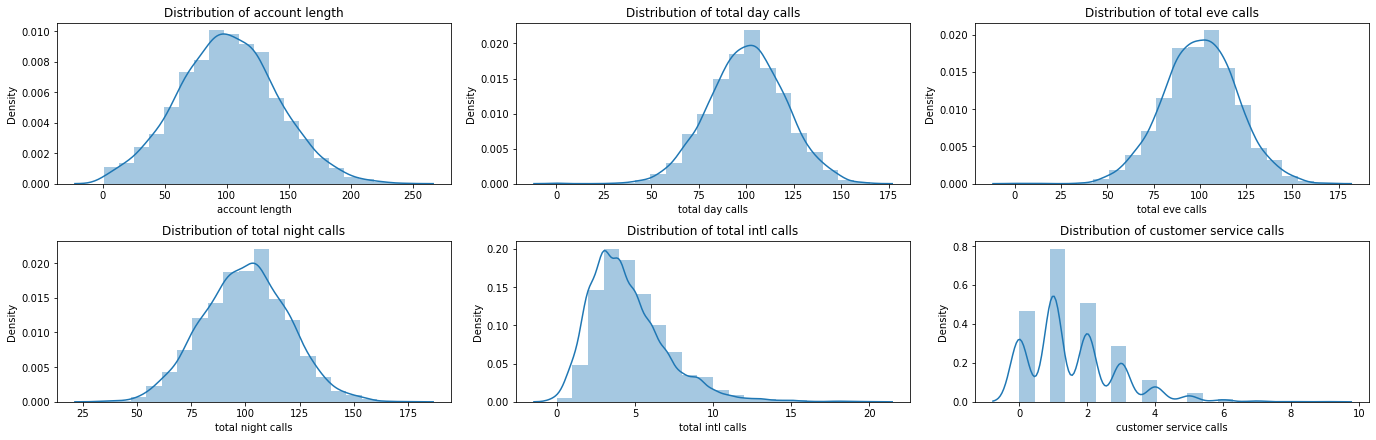

In [14]:
# Function to create distribution plots
def plot_distributions(df, columns, bins=20, figsize=(19, 6)):
    num_cols = len(columns)
    num_rows = (num_cols + 2) // 3  # Calculate the number of rows needed
    fig, ax = plt.subplots(num_rows, 3, figsize=figsize, constrained_layout=True)
    ax = ax.flatten()  # Flatten the 2D array of axes to 1D for easier indexing

    for i, column in enumerate(columns):
        sns.distplot(df[column], bins=bins, ax=ax[i])
        ax[i].set_title(f'Distribution of {column}')

    # Hide any remaining empty subplots
    for j in range(i + 1, len(ax)):
        fig.delaxes(ax[j])

    plt.show()
    # Columns to plot
columns_to_plot = [
    'account length', 'total day calls', 'total eve calls',
    'total night calls', 'total intl calls', 'customer service calls'
]

# Call the function
plot_distributions(df, columns_to_plot)

## Checking for outliers

In [15]:
# creating categorical and numerical columns
num_columns = ['account length','number vmail messages','total day minutes','total day calls','total day charge',
                'total eve minutes','total eve calls','total eve charge','total night minutes','total night calls',
                'total night charge','total intl minutes','total intl calls','total intl charge','customer service calls']
categ_columns = ['state','area code','international plan','voice mail plan']

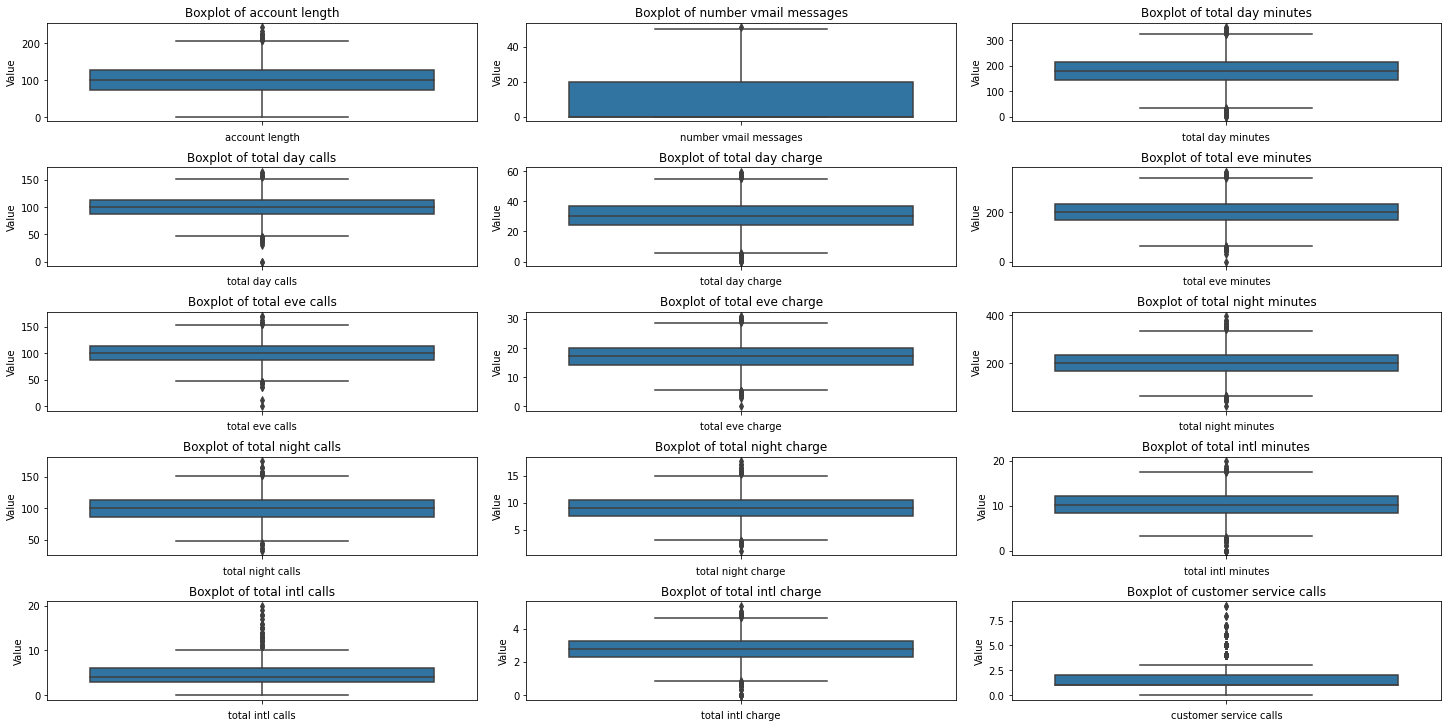

In [16]:
def plot_boxplots(df, columns, figsize=(20, 10)):
   
    n_cols = 3  # Number of columns in the subplot grid
    n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate rows needed based on the number of columns
    
    fig, ax = plt.subplots(n_rows, n_cols, figsize=figsize, constrained_layout=True)
    ax = ax.flatten()  # Flatten the array of axes for easy iteration

    for i, column in enumerate(columns):
        sns.boxplot(y=df[column], ax=ax[i])
        ax[i].set_title(f'Boxplot of {column}')
        ax[i].set_xlabel(column)
        ax[i].set_ylabel('Value')
    
    # Remove any unused subplots
    for i in range(len(columns), len(ax)):
        fig.delaxes(ax[i])
    
    plt.show()
plot_boxplots(df, num_columns)

In [17]:
#dealing with outlier
def remove_outliers(df, columns):
    df_no_outliers = df.copy()
    for column in columns:
        z_scores = zscore(df[column])
        outliers = (z_scores > 3) | (z_scores < -3)
        df_no_outliers.loc[outliers, column] = df[column].median()
    return df_no_outliers
df_no_outliers = remove_outliers(df, num_columns)
